# Project: Investigate a Dataset - TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be analzing TMDb  movie data 1960 - 2015 (cleaned from original data on Kaggle). This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
Some questions we will be analyzing include:
1. Which movie has the highest all-time polularity?
2. Which movie has the highest all-time budget?
3. Which movie generated more revenue, per year, and overall?
4. Does movie genre determine revenue?
5. What is the best production company doing differently?
6. Which genres are most popular from year to year?
7. What kinds of properties are associated with movies that have high revenues?
8. Which stars are the most prominent casts?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

% matplotlib inline

In [2]:
# Pandas upgrade (to access dataframe.explode() method)
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
#load dataset
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
#first five observations
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#A quick insight into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

All the features seem to have appropriate data types assigned to them. However will will do a recast on **release_date** from string to pandas datetime format

In [5]:
#convert release_date to pandas datetime
df["release_date"] = pd.to_datetime(df["release_date"])

In [6]:
#check conversion result
df.release_date.dtype

dtype('<M8[ns]')

#### Let's examine all the features/columns and draft and out possible questions for analysis.
#### This will help us in removing columns  that won't help in answering our questions

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

1. Which movie has the highest all-time polularity?
2. Which movie has the highest all-time budget?
3. Which movie generated more revenue, per year, and overall?
4. Does movie genre determine revenue?
5. What is the best production company doing differently?
6. Which genres are most popular from year to year?
7. What kinds of properties are associated with movies that have high revenues?
8. Which stars are the most prominent casts?

We will get rid of the following columns as they are not needful for the analysis/answering above questions

"id", "imdb_id", "original_title", "keywords", "overview", "homepage", "tagline", 

In [8]:
#Drop unneccessary columns
df.drop(columns = ["id","imdb_id", "keywords", "overview", "homepage", "tagline"], inplace = True)

## Checking for missing values

In [9]:
#Now let's check for missing values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**cast** - we will delete affected observations <br>
**director** - we will delete affected observations <br>
**genres** -  we will delete affected observations <br>
**production_companies**we will delete affected observations ~~we ignore this and only use it if we want to do any analysis that relates to it~~

In [10]:
#Drop null values
df.dropna(inplace = True)

In [11]:
#Let's check that everything worked as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [12]:
#Let's check for duplicate values
df.duplicated().sum()

1

 We have 1 duplicate record that has to be dropped

In [13]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Duplicate row has been removed


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

## Let's Explore

In [14]:
#Statistical overview
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


From this statistics:
1. For the given period of years (1960 - 2015), there been an average revenue of 44231208.89 in the movie industry <br>
2. There has been an average budget of 16179667.921715105 in the movie industry <br>
3. Looking at vote count, there's a wide gap between maximum and minimum vote count which could either mean there are outliers or that some movies actually had very low vote count

#### Let's see some generalized plots

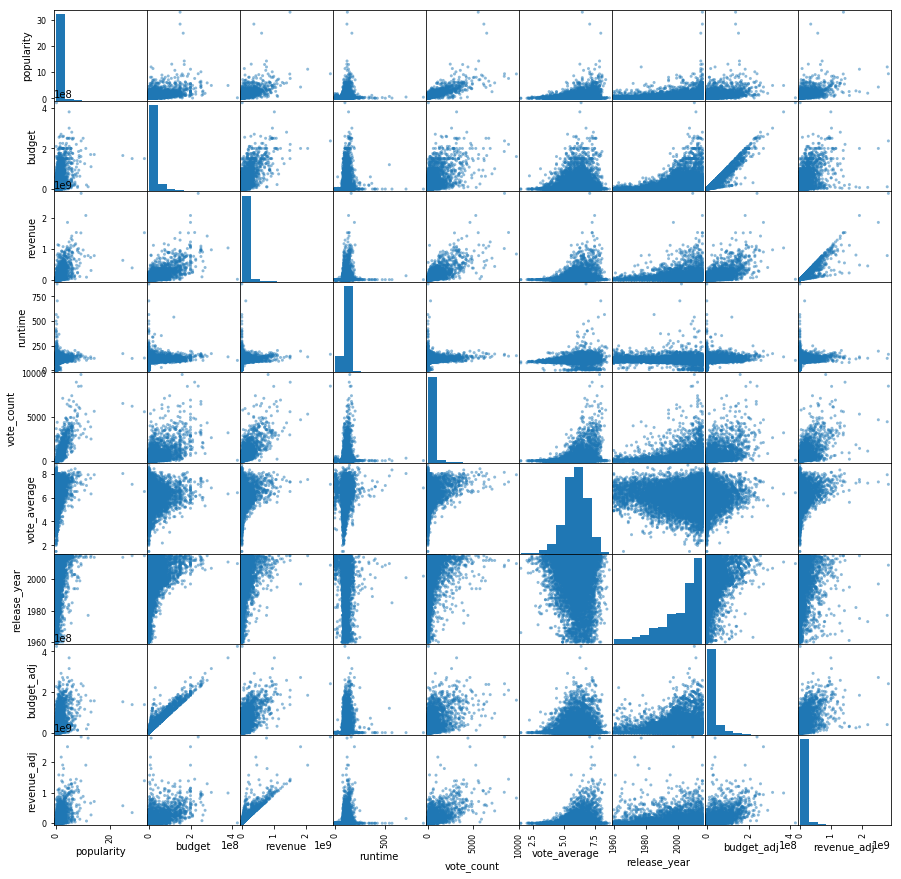

In [15]:
pd.plotting.scatter_matrix(df, figsize = (15,15));

The above plot shows a general relationship between all of the features using scattered plot and histogram. Some key findings from the plots are:
1. Very obviously and as expected, revenue and revenue_adj have very strong correlation <br>
2. Likwise, budget and budget_adj also have very strong correlation <br>
3. Other features that show some level of correlation include:<br>
--popularity and revenue_adj <br>
--popularity and budget_adj <br>
--revenue and budget_adj <br>
--revenue_adj and budget_adj <br>
--budget and vote_count <br>
--budget and revenue <br>
4. Most of the charts are right-skewed, except for vote average that  is almost normalized but tends towards left-skew

#### We can use seaborn to make a correlation chart to view the correlations better

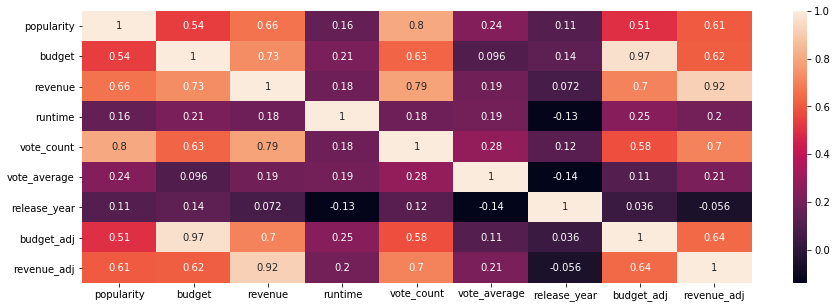

In [16]:
plt.figure(figsize = (15, 5))
sns.heatmap(df.corr(), annot = True);

We have used default colors for this chart. The lighter colors reveal strong correlations while the the darker the color gets, the less correlated they actually are. <br>
For example it is very easy to see that popularity and vote_count go hand in hand.

### Research Question 1 (Which movie has the highest all-time polularity)

In [17]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
#Highest popularity
df[df["popularity"] == df["popularity"].max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Jurassic World release 2015 has the highest popularity

**Let's get the top ten popular movies**

In [19]:
pop_10 = df.sort_values("popularity", ascending = False).head(10)
pop_10

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08
630,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
631,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014,1.565855e+08,6.583651e+08
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
632,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
633,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,2014-11-18,3590,6.6,2014,1.151364e+08,6.927528e+08


Text(0.5,1,'A plot showing top 10 movies based on popularity')

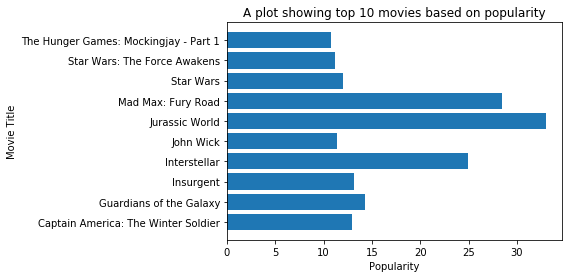

In [20]:
# plt.bar(x = pop_10.original_title, height = pop_10.popularity)
# plt.xticks(rotation=90);

plt.barh(y = pop_10.original_title, width = pop_10.popularity);
plt.ylabel("Movie Title")
plt.xlabel("Popularity")
plt.title("A plot showing top 10 movies based on popularity")

The chart above easily shows the top 10 popular movies as of 1960 to 2015.

`Mad Max: Fury Road` coming after `Jurassic World`

Let's see what genre of movie they are and their year of release

In [21]:
pop_10[["popularity", "genres", "release_year", "original_title"]].sort_values("popularity", ascending = False).head(10)

,popularity,genres,release_year,original_title
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Jurassic World
1,28.419936,Action|Adventure|Science Fiction|Thriller,2015,Mad Max: Fury Road
629,24.949134,Adventure|Drama|Science Fiction,2014,Interstellar
630,14.311205,Action|Science Fiction|Adventure,2014,Guardians of the Galaxy
2,13.112507,Adventure|Science Fiction|Thriller,2015,Insurgent
631,12.971027,Action|Adventure|Science Fiction,2014,Captain America: The Winter Soldier
1329,12.037933,Adventure|Action|Science Fiction,1977,Star Wars
632,11.422751,Action|Thriller,2014,John Wick
3,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,Star Wars: The Force Awakens
633,10.739009,Science Fiction|Adventure|Thriller,2014,The Hunger Games: Mockingjay - Part 1


There appears to be something perculiar to all of them. <br>
They're Action, Adventure, Thriller Sci-Fi movies

**Now I'm curious to know about the 10 least polular movies**

In [22]:
#10 least popular movies
least_pop_10 = df.sort_values("popularity", ascending = False).tail(10)
least_pop_10

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6553,0.001983,0,0,Paheli,Shah Rukh Khan|Rani Mukerji|Naseeruddin Shah,Amol Palekar,141,Drama|Thriller|Science Fiction|Romance|Foreign,Red Chillies Entertainment,2005-06-24,13,6.2,2005,0.0,0.000000
4947,0.001783,0,273747,The Central Park Five,Antron McCray|Kevin Richardson|Yusef Salaam|Ra...,Sarah Burns|Ken Burns,119,Documentary,Florentine Films|WETA,2012-05-24,22,6.4,2012,0.0,259989.647787
4919,0.001635,0,0,Freddie Mercury: The Great Pretender,Freddie Mercury|Roger Taylor|Brian May|Luciano...,Rhys Thomas,107,Music|Documentary,Arte|Eagle Rock Entertainment,2012-09-25,10,7.2,2012,0.0,0.000000
1918,0.001423,0,0,Circle of Eight,Austin Highsmith|Jesse Johnson|Ryan Doom|Josh ...,Stephen Cragg,84,Mystery|Horror,Bronson Avenue|Paramount Pictures Digital Ente...,2009-10-27,11,4.3,2009,0.0,0.000000
4948,0.001372,0,0,The Invisible War,Kori Cioca|Jessica Hinves|Ariana Klay|Elle Hel...,Kirby Dick,93,Crime|Drama|History|Documentary,Canal+|Chain Camera Pictures|ITVS|Rise Films|G...,2012-01-20,17,7.0,2012,0.0,0.000000
3370,0.001317,0,0,Fuera de carta,Javier CÃ¡mara|Lola DueÃ±as|Fernando Tejero|Be...,Nacho G. Velilla,111,Comedy,TLA Releasing,2008-04-11,13,5.3,2008,0.0,0.000000
6961,0.001115,0,0,Khosla Ka Ghosla!,Anupam Kher|Boman Irani|Parvin Dabas|Tara Shar...,Dibakar Banerjee,135,Comedy,UTV Motion Pictures,2006-09-22,10,6.8,2006,0.0,0.000000
6551,0.000973,0,0,Mon petit doigt m'a dit...,Catherine Frot|AndrÃ© Dussollier|GeneviÃ¨ve Bu...,Pascal Thomas,105,Comedy|Mystery,RhÃ´ne-Alpes CinÃ©ma|France2 CinÃ©ma,2005-04-13,13,5.7,2005,0.0,0.000000
6080,0.000620,0,0,G.B.F.,Michael J. Willett|Paul Iacono|Sasha Pieterse|...,Darren Stein,92,Comedy,School Pictures|Parting Shots Media|Logolite E...,2013-10-20,82,6.1,2013,0.0,0.000000
9977,0.000188,0,0,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,Arthur Hiller,103,Mystery|Comedy|Drama,Simcha Productions,2071-12-14,10,6.4,1971,0.0,0.000000


Something is really obvious here. These movies had 0 budget and 0 revenue. Interesting.

Text(0.5,1,'A plot showing least 10 movies based on popularity')

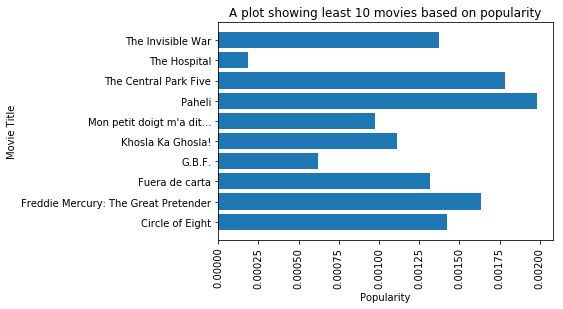

In [23]:
#Let's pull  a chart for them
plt.barh(y = least_pop_10.original_title, width = least_pop_10.popularity)
plt.xticks(rotation = 90);
plt.ylabel("Movie Title")
plt.xlabel("Popularity")
plt.title("A plot showing least 10 movies based on popularity")

Let's see what genre of movie they are and their year of release

In [24]:
least_pop_10[["popularity", "genres", "release_year", "original_title"]].sort_values("popularity", ascending = False).head(10)

,popularity,genres,release_year,original_title
6553,0.001983,Drama|Thriller|Science Fiction|Romance|Foreign,2005,Paheli
4947,0.001783,Documentary,2012,The Central Park Five
4919,0.001635,Music|Documentary,2012,Freddie Mercury: The Great Pretender
1918,0.001423,Mystery|Horror,2009,Circle of Eight
4948,0.001372,Crime|Drama|History|Documentary,2012,The Invisible War
3370,0.001317,Comedy,2008,Fuera de carta
6961,0.001115,Comedy,2006,Khosla Ka Ghosla!
6551,0.000973,Comedy|Mystery,2005,Mon petit doigt m'a dit...
6080,0.000620,Comedy,2013,G.B.F.
9977,0.000188,Mystery|Comedy|Drama,1971,The Hospital


Most of these movies are comedy, documentary or horror movies
Although `Paheli` falls in the Thriller|Science Fiction category we saw that it had 0 zero budget. <br>

So genre and budget can play a vital role in a movie's popularity. 

### Research Question 2 (Which movie has the highest all-time budget?)

But does that mean Jurassic World had the highest budget? Let's check!

In [25]:
df.sort_values("budget", ascending = False).head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,2006-06-28,834,5.3,2006,2.920507e+08,4.230205e+08
4411,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,2012-03-07,1479,6.0,2012,2.469335e+08,2.698595e+08
1929,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2010-11-24,2019,7.3,2010,2.600000e+08,5.917949e+08
7394,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,2007-05-01,2083,5.8,2007,2.713305e+08,9.369017e+08
5508,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,2.386885e+08,8.357833e+07
4367,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,Peter Jackson,169,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,2012-11-26,6417,6.9,2012,2.374361e+08,9.658933e+08


Well, on the contrary, Jurassic world does not fall in the top 10 most expensive movies.
`The Warrior's Way` had the highest budget but had popularity of `0.250540` <br>
What could be resposible for this? perhaps the casts or the director or company? We have to keep checking.

### Research Question 3  (Which movie generated more revenue, per year, and overall?)

In [26]:
rev = df.sort_values("revenue", ascending = False).head(10)
rev

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09


In [27]:
x = np.array(rev.revenue)

exp = [0.2, 0.1, 0, 0, 0,0,0,0,0,0]

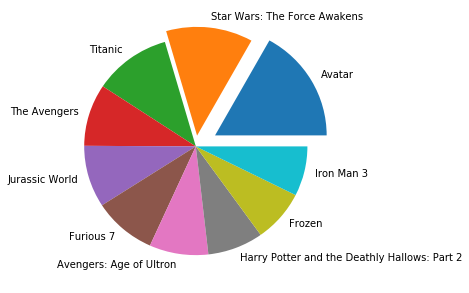

In [28]:
plt.figure(figsize = (5, 5))
plt.pie(x = x, labels = rev.original_title, explode = exp);

Considering that it was 2009, the producers of `Avatar` did a good job gaining that much revenue from the movie. <br>
We also see a pattern of some popular company on top of this dataframe

### Research Question 4  (Does movie genre determine revenue?)

We have seen that movie genre influences popularity which in turn affects revenue

### Research Question 5  (What is the best production company doing differently?)

This may seem a bit ambigous. But we will use some parameters/features to determine the best production company

In [29]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

We shall use popularity, vote_count and revenue to determine the best companies

In [30]:
best_comp = df.sort_values(['revenue','vote_count','popularity'],  ascending = False).head(10)
best_comp.loc[:,['production_companies','budget','revenue','vote_count','popularity', 'original_title', 'runtime', 'genres']]
# best_comp

,production_companies,budget,revenue,vote_count,popularity,original_title,runtime,genres
1386,Ingenious Film Partners|Twentieth Century Fox ...,237000000,2781505847,8458,9.432768,Avatar,162,Action|Adventure|Fantasy|Science Fiction
3,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,5292,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy
5231,Paramount Pictures|Twentieth Century Fox Film ...,200000000,1845034188,4654,4.355219,Titanic,194,Drama|Romance|Thriller
4361,Marvel Studios,220000000,1519557910,8903,7.637767,The Avengers,143,Science Fiction|Action|Adventure
0,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,5562,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller
4,Universal Pictures|Original Film|Media Rights ...,190000000,1506249360,2947,9.335014,Furious 7,137,Action|Crime|Thriller
14,Marvel Studios|Prime Focus|Revolution Sun Studios,280000000,1405035767,4304,5.944927,Avengers: Age of Ultron,141,Action|Adventure|Science Fiction
3374,Warner Bros.|Heyday Films|Moving Picture Compa...,125000000,1327817822,3750,5.711315,Harry Potter and the Deathly Hallows: Part 2,130,Adventure|Family|Fantasy
5422,Walt Disney Pictures|Walt Disney Animation Stu...,150000000,1274219009,3369,6.112766,Frozen,102,Animation|Adventure|Family
5425,Marvel Studios,200000000,1215439994,6882,4.946136,Iron Man 3,130,Action|Adventure|Science Fiction


In [31]:
best_comp.runtime.mean()

139.9

We see a trend here:
1. high budget
2. average runtime of 139.9
3. Action|Adventure|Science Fiction|Thriller

**Let's see if there is a trend in casts**

In [32]:
topcast = pd.DataFrame()
topcast[['cast1', 'cast2', 'cast3', 'cast4', 'cast5']] = best_comp.cast.str.split("|", expand = True)
topcast

,cast1,cast2,cast3,cast4,cast5
1386,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
5231,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates
4361,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Scarlett Johansson
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
14,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Chris Evans,Scarlett Johansson
3374,Daniel Radcliffe,Rupert Grint,Emma Watson,Alan Rickman,Maggie Smith
5422,Kristen Bell,Idina Menzel,Jonathan Groff,Josh Gad,Santino Fontana
5425,Robert Downey Jr.,Gwyneth Paltrow,Guy Pearce,Don Cheadle,Ben Kingsley


We can't say there is a pattern in casts for sure. We only see `Robert Downey Jr.` feature in 3 movies of the top 10 movies as a majo cast

Let us get the list of all casts

**Firstly we need to reset the index column because they now have the wrong values after dropping columns**

In [33]:
#Let's reset index since some rows were deleted
df.reset_index(inplace = True)
df.drop(columns = ["index"], inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### Research Question 6 (Which genres are most popular from year to year?)

In [34]:
genres_df = df.assign(genres_=df['genres'].str.split('|')).explode('genres_')
genres_df['genres_'].value_counts()

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
Name: genres_, dtype: int64

Without doubt, `Drama` genre has more popularity from year to year with a total 4364

### Research Question 7 (What kinds of properties are associated with movies that have high revenues?)

In [35]:
#             ax.get_yaxis().get_major_formatter().set_useOffset(False)
#             ax.get_yaxis().get_major_formatter().set_scientific(False)

In [36]:
desc = ["This shows some level positive correlation between popularity and revenue. Implying that a movie's popularity can affect it's revenue", 
"This is showing us that budget can also tremendously affect a movie's revenue as we see another strong relationship","Of course we can't consider this, but this is what a perfect correlation should look like.", "Revenue and runtime show no meaningful correlation, we can say that a movie's runtime has little or no impact on revenue generated",
"Again we see a yet stron correlation between vote_count and revenue; meaning, working towards high vote count can impact revenue", "vote_average shows no meaningful correlation with revenue.",
"Likewise, release year shows almost no correlation with revenue. So year of production, according to the scope of the dataset does not affect revenue", "budget_adj shows some level of positve correlation with revenue", "Now we see revenue_adj showing a perfect positive correlation with revenue, which is expected"]

In [ ]:
def plot_scatter(df):
    n = 0
    sp = 1
    for x in df.columns:
        if df[f"{x}"].dtypes == float or df[f"{x}"].dtypes == int:
            plt.subplot(3, 3, sp)
            plt.scatter(df[f'{x}'], df["revenue"], s = 1, alpha = 0.1)
            plt.figtext(0.5, -0.1, desc[n], wrap=True, horizontalalignment='center', fontsize=12)
            ax = plt.gca() 
            ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
            plt.draw()
            plt.title(f'A scatter plot showing {x} and revenue')
            ax.legend()
            
            n += 1
            sp += 1

#             for tick in ax.get_xticklabels():
#                 tick.set_rotation(360)

plt.figure(figsize=(20,10))
plot_scatter(df)

The figures show that `budget`, `popularity`, and `vote count` are strongly related to revenue

### Research Question 8  (Which stars are the most prominent casts?)

Let's retunrn the 10 casts from the variable `all_cast`

In [38]:
cast_df = df.assign(cast_=df['cast'].str.split('|')).explode('cast_')
cast_df['cast_'].value_counts()[:10]

Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
Michael Caine        52
Robin Williams       51
Morgan Freeman       49
John Goodman         48
John Cusack          48
Susan Sarandon       47
Name: cast_, dtype: int64

From the above analysis we see the top 10 casts from 1960 - 2015 with `Robert De Niro` appearing in 72 movies and `Alec Baldwin` featuring in 47 movies

<a id='conclusions'></a>
## Conclusions

We have been able to see that budget and genre plays a vital role in movie quality and revenue. 
Other inconclusive factors are casts, company, director and perhaps title

We also saw consistent pattern of drama movie genre from year to year.

#### Limitations
The popularity column is confusing. For example Jurassic World recives popularity of 32.98, whereas Avatar, Dark Knight have a popularity of less than 10
Similarly, the dataset does not include movies from other regions like Nollywood and Bollywood. More recently movie called Baahubali by director SS Rajamouli has been well received world wide and he is in the league of Nolan, Cameron.. but his movies are absent from this list.



In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0